# Predict the Potential Customers have propensity to purchase

Let explain step by step that we will be following

1. Import the necessary libraries
2. Load the data
3. Data cleaning and preprocessing
4. Exploratory Data Analysis (EDA)
5. Feature selection and Feature engineering
6. Train/Test split
7. Model selection and training
8. Model evaluation

Let's get started!

## STEP1: Importing the necessary libraries and loading the data

In [1]:
!pip3 install seaborn

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

## STEP2: Load the data

In [3]:
# Load the data
df = pd.read_csv('../data/Insurance Claim Analysis-Demographic and Health/insurance_data.csv')
df

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01
...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


In [4]:
print(df.columns)

Index(['index', 'PatientID', 'age', 'gender', 'bmi', 'bloodpressure',
       'diabetic', 'children', 'smoker', 'region', 'claim'],
      dtype='object')


## STEP3: Data cleaning and preprocessing

Check for missing values

In [5]:
df.isnull().sum()

index            0
PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

Drop the rows with missing values

In [6]:
df.dropna(inplace=True)
df

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
7,7,8,19.0,male,41.1,100,No,0,No,northwest,1146.80
8,8,9,20.0,male,43.0,86,No,0,No,northwest,1149.40
9,9,10,30.0,male,53.1,97,No,0,No,northwest,1163.46
...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87


In [7]:
print(df.columns)

Index(['index', 'PatientID', 'age', 'gender', 'bmi', 'bloodpressure',
       'diabetic', 'children', 'smoker', 'region', 'claim'],
      dtype='object')


Check for duplicates

In [8]:
df.duplicated().sum()

0

In [9]:
print(df.columns)

Index(['index', 'PatientID', 'age', 'gender', 'bmi', 'bloodpressure',
       'diabetic', 'children', 'smoker', 'region', 'claim'],
      dtype='object')


Convert categorical variables to numerical variables using one-hot encoding

In [10]:
df = pd.get_dummies(df, columns=['gender', 'diabetic', 'smoker', 'region'])
df

,index,PatientID,age,bmi,bloodpressure,children,claim,gender_female,gender_male,diabetic_No,diabetic_Yes,smoker_No,smoker_Yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0,1,39.0,23.2,91,0,1121.87,0,1,0,1,1,0,0,0,1,0
1,1,2,24.0,30.1,87,0,1131.51,0,1,1,0,1,0,0,0,1,0
7,7,8,19.0,41.1,100,0,1146.80,0,1,1,0,1,0,0,1,0,0
8,8,9,20.0,43.0,86,0,1149.40,0,1,1,0,1,0,0,1,0,0
9,9,10,30.0,53.1,97,0,1163.46,0,1,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,44.0,35.5,88,0,55135.40,1,0,0,1,0,1,0,1,0,0
1336,1336,1337,59.0,38.1,120,1,58571.07,1,0,1,0,0,1,1,0,0,0
1337,1337,1338,30.0,34.5,91,3,60021.40,0,1,0,1,0,1,0,1,0,0
1338,1338,1339,37.0,30.4,106,0,62592.87,0,1,1,0,0,1,0,0,1,0


In [11]:
print(df.columns)

Index(['index', 'PatientID', 'age', 'bmi', 'bloodpressure', 'children',
       'claim', 'gender_female', 'gender_male', 'diabetic_No', 'diabetic_Yes',
       'smoker_No', 'smoker_Yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')


Normalize the continuous variables

In [12]:
df['age'] = (df['age'] - df['age'].mean()) / df['age'].std()
df['bmi'] = (df['bmi'] - df['bmi'].mean()) / df['bmi'].std()
df['children'] = (df['children'] - df['children'].mean()) / df['children'].std()

In [13]:
print(df.columns)

Index(['index', 'PatientID', 'age', 'bmi', 'bloodpressure', 'children',
       'claim', 'gender_female', 'gender_male', 'diabetic_No', 'diabetic_Yes',
       'smoker_No', 'smoker_Yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')


Scale the numerical variables

In [14]:
scaler = StandardScaler()
df[['age', 'bmi', 'children']] = scaler.fit_transform(df[['age', 'bmi', 'children']])
df

,index,PatientID,age,bmi,bloodpressure,children,claim,gender_female,gender_male,diabetic_No,diabetic_Yes,smoker_No,smoker_Yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0,1,0.082248,-1.219345,91,-0.912356,1121.87,0,1,0,1,1,0,0,0,1,0
1,1,2,-1.268053,-0.091281,87,-0.912356,1131.51,0,1,1,0,1,0,0,0,1,0
7,7,8,-1.718154,1.707084,100,-0.912356,1146.80,0,1,1,0,1,0,0,1,0,0
8,8,9,-1.628134,2.017710,86,-0.912356,1149.40,0,1,1,0,1,0,0,1,0,0
9,9,10,-0.727933,3.668936,97,-0.912356,1163.46,0,1,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1335,1336,0.532349,0.791553,88,-0.912356,55135.40,1,0,0,1,0,1,0,1,0,0
1336,1336,1337,1.882650,1.216621,120,-0.082828,58571.07,1,0,1,0,0,1,1,0,0,0
1337,1337,1338,-0.727933,0.628065,91,1.576227,60021.40,0,1,0,1,0,1,0,1,0,0
1338,1338,1339,-0.097792,-0.042234,106,-0.912356,62592.87,0,1,1,0,0,1,0,0,1,0


In [15]:
print(df.columns)

Index(['index', 'PatientID', 'age', 'bmi', 'bloodpressure', 'children',
       'claim', 'gender_female', 'gender_male', 'diabetic_No', 'diabetic_Yes',
       'smoker_No', 'smoker_Yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')


## STEP4: Exploratory Data Analysis (EDA)

Explore the distribution of the target variable

<AxesSubplot:xlabel='claim', ylabel='Count'>

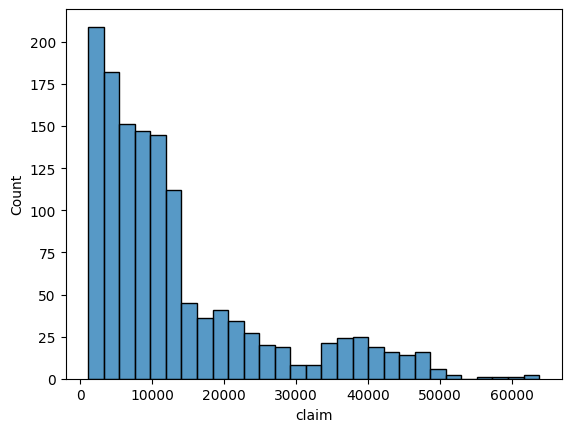

In [16]:
sns.histplot(df['claim'])

Explore the correlation between the target variable and the features

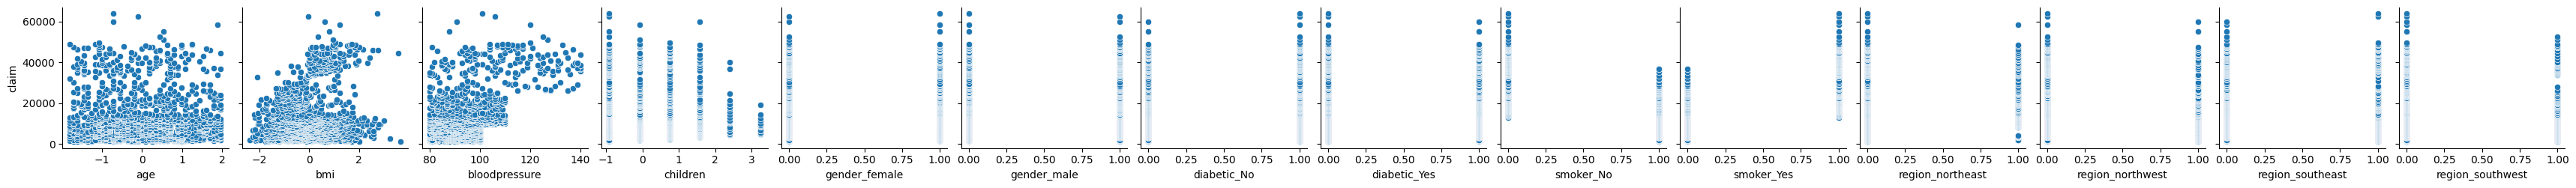

In [17]:
sns.pairplot(df, 
             x_vars=['age', 'bmi', 'bloodpressure', 'children', 'gender_female', 'gender_male',
                     'diabetic_No', 'diabetic_Yes','smoker_No', 'smoker_Yes',
                     'region_northeast', 'region_northwest','region_southeast', 'region_southwest'],
             y_vars=['claim'])

Explore the correlation between the features

<AxesSubplot:>

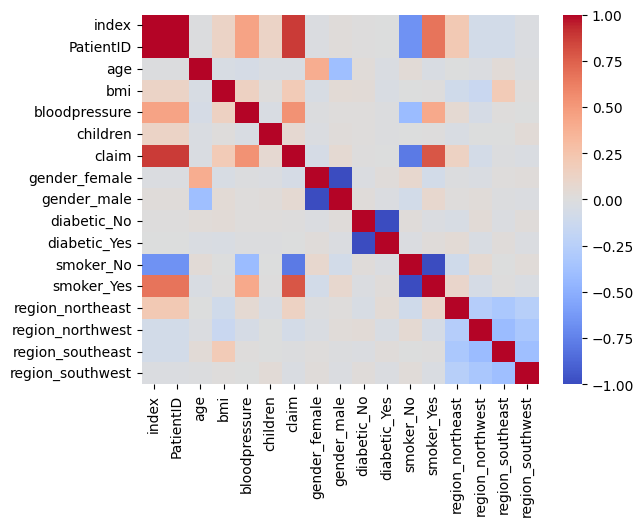

In [18]:
sns.heatmap(df.corr(), cmap='coolwarm')

## STEP5: Feature selection and engineering

Select the features to be used in the model

In [19]:
# X = df[['age', 'bmi', 'bloodpressure', 'children']]
X = df[['age', 'bmi', 'bloodpressure', 'children', 'gender_female', 'gender_male',
                     'diabetic_No', 'diabetic_Yes','smoker_No', 'smoker_Yes',
                     'region_northeast', 'region_northwest','region_southeast', 'region_southwest']]
y = df['claim']

## STEP6: Train/Test split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## STEP7: Model selection and training

Try out different regression models

In [21]:
models = {'Linear Regression': LinearRegression(),
          'Ridge Regression': Ridge(),
          'Lasso Regression': Lasso(),
          'Elastic Net Regression': ElasticNet(),
          'Decision Tree Regression': DecisionTreeRegressor(),
          'Random Forest Regression': RandomForestRegressor(),
          'Gradient Boosting Regression': GradientBoostingRegressor()}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    print(f'{name}: {np.mean(scores):.3f} ({np.std(scores):.3f})')

Linear Regression: 0.692 (0.038)
Ridge Regression: 0.692 (0.038)
Lasso Regression: 0.692 (0.038)
Elastic Net Regression: 0.527 (0.054)
Decision Tree Regression: 0.603 (0.045)
Random Forest Regression: 0.788 (0.026)
Gradient Boosting Regression: 0.798 (0.024)


Model selection and training

This code uses grid search to find the best hyperparameters for the Gradient Boosting Regression model, and then fits the model using the best hyperparameters.

In [22]:
model = GradientBoostingRegressor()
params = {'n_estimators': [100, 200, 500],
          'max_depth': [3, 5, 10],
          'learning_rate': [0.001, 0.01, 0.1]}
grid_search = GridSearchCV(model, params, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
print(f'Best parameters: {grid_search.best_params_}')
model = grid_search.best_estimator_
model.fit(X_train, y_train)

Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}


GradientBoostingRegressor(learning_rate=0.01, n_estimators=500)

## STEP8: Model evaluation

This code calculates the root mean squared error and R-squared score for the training and test sets.

We can use the trained model to predict the propensity of new customers to purchase insurance by passing their demographic and health information through the predict method of the model.

In [23]:
y_train_pred = model.predict(X_train)
print(f'Train RMSE: {mean_squared_error(y_train, y_train_pred, squared=False):.2f}')
print(f'Train R^2 score: {r2_score(y_train, y_train_pred):.2f}')

y_test_pred = model.predict(X_test)
print(f'Test RMSE: {mean_squared_error(y_test, y_test_pred, squared=False):.2f}')
print(f'Test R^2 score: {r2_score(y_test, y_test_pred):.2f}')

Train RMSE: 4850.78
Train R^2 score: 0.84
Test RMSE: 4816.22
Test R^2 score: 0.84
